<a href="https://colab.research.google.com/github/viriditass/Paper-Review/blob/main/XLNet_Generalized_Autoregressive_Pretraining_for_Language_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **XLNet: Generalized Autoregressive Pretraining for Language Understanding**

논문 링크: https://arxiv.org/abs/1906.08237

본 논문에서 제안하는 XLNet은 auto-regressive model(Ex. GPT)와 auto-encoder model(Ex. BERT)의 장점을 결합하여 만든 generalized AR pretraining model이다. 또한, 본 논문은 당시 NLP task에서 SOTA 성능을 보이는 BERT를 큰 차이로 outperform했다.

AR model의 단점은 BERT에서 살펴봤으니 생략하고 이번엔 BERT와 같은 AE model의 단점만 살펴보겠다.

 AR과 달리 AE의 경우 특정 [MASK] token을 맞추기 위해  양방향 정보(Bidirectional self-attention)를 이용할 수 있다. 그러나, **independant assuumption으로 모든 [MASK] token이 독립적으로 예측됨으로 이들 사이 사이의 dependency를 학습할 수 없다.** 또한,**noise(=[MASK] token) 자체는 실제 fine-tuning 과정에서 등장하지 않아 pre-training과 fine-tuning 사이의 불일치를 야기한다.**

이해를 돕기 위해 예시를 들어보자면 "나의 고향은 전라남도 광주다" 라는 문장에서 "전라남도"와 "광주다"를 [MASK] 처리하게 된다면, "나의 고향은 MASK MASK" 라는 문장이 되는데, "나의 고향은" 이라는 문맥만 보면 [MASK]를 예측하기 어렵지만, 전라남도를 고려하면 좀 더 맞추기 쉬워진다. 하지만, BERT의 경우 이런것들을 전혀 고려하지 않고 각각의 [MASK] 단어가 독립적이다.

## **XLNet**

먼저, XLNet은 이러한 AR, AE와 같은 기존의 방식들의 장점만 살리고 단점을 극복하기 위해 **Permutation Language Modeling Method**를 제안한다.

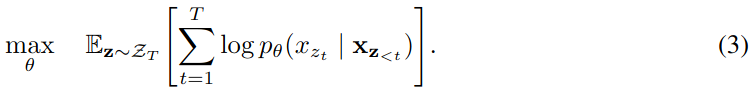

해당 방법을 간단히 수식으로 나타내면 위와 같다. input sequence index의 모든 permutation을 고려한 AR 방식을 이용한다.

이해를 돕기 위해 예시를 들어보자면,
- input sequence가 만일 [x1, x2, x3, x4]라고 가정을 하면
- 해당 input에 대한 permutation 집한은 총 24(=4!)개이며
- 이를 식으로 나타내면 Z_T = [[x1, x2, x3, x4], [x1, x2, x4, x3], [x1, x3, x2, x4], ..., [x4, x3, x2, x1]와 같다.

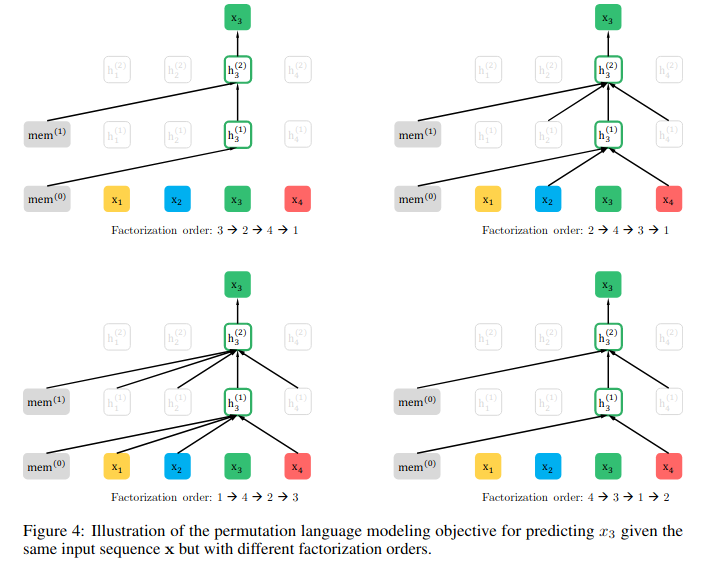

위에서 구한 Z_T에 대해 AR Language Model의 object를 적용하면 위의 그림 Figure 4와 같다. (mem은 Transformer-XL의 memory state이다.)

해당 그림을 통해 좀 설명을 해보자면
1. 각 token들은 원새 순서에 따라 positional encoding이 부여되며, permutation은 token의 순서에 대해서만 진행이 된다. 따라서 positional encoding에 의해 어떤 token들의 상대적인 위치를 알 수 있다.
2. 각 순서들에 대해 X_3를 예측하는 부분을 보면 모든 permutation Z_T에 대해 위 과정을 수행하는 X_3를 제외한 모든 부분 집합에 conditional한 X_3의 probability를 계산할 수 있다. (이를 통해 AR model의 단방향성을 극복한다.)
3. 전체적으로 AR 방식이기 때문에 independent assumption을 할 필요가 없기

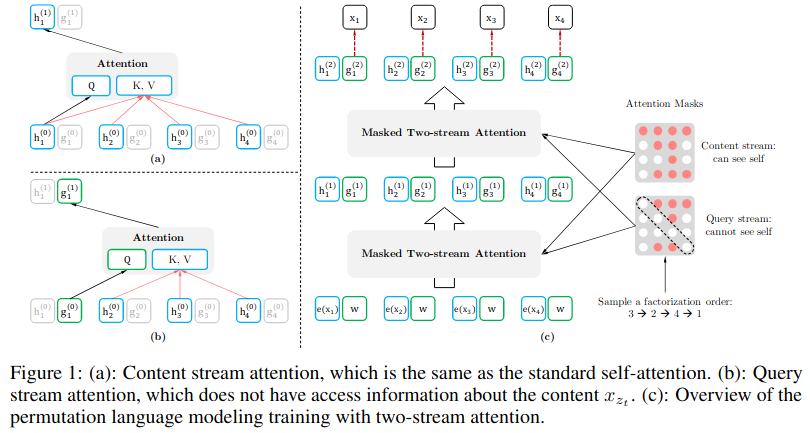